In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
tf.config.experimental.list_physical_devices('GPU')
import datetime
from keras.models import Sequential
from keras.layers import Conv2D, Dense, AveragePooling2D, Dropout, Flatten

<h1>Extract MNIST data</h1>

In [3]:
#get mnist data, with one_hot encoding
mnist = tf.keras.datasets.mnist.load_data(path="mnist.npz")
(train_images, train_labels), (test_images, test_labels) = mnist
tl = train_labels
train_images = train_images.astype("float32")/255.0
test_images = test_images.astype("float32")/255.0
train_labels = tf.one_hot(train_labels,depth=10)
test_labels = tf.one_hot(test_labels, depth=10)

<h1>Prepare training, validation and testing data</h1>

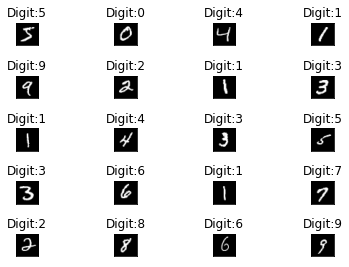

(60000, 32, 32, 1)


In [4]:
#pad images with 0s (28x28 to 32x32)
x_train = np.pad(train_images, ((0,0),(2,2),(2,2)), 'constant')
x_test = np.pad(test_images, ((0,0),(2,2),(2,2)), 'constant')
def plot_digits(X, Y):
    for i in range(20):
        plt.subplot(5, 4, i+1)
        plt.tight_layout()
        plt.imshow(X[i].reshape(32, 32), cmap='gray')
        plt.title('Digit:{}'.format(Y[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()
plot_digits(x_train, tl)
x_train = x_train.reshape(x_train.shape[0], 32, 32, 1)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 1)
print(x_train.shape)

In [5]:
print(x_train.shape, train_labels.shape)
print(x_test.shape, test_labels.shape)

(60000, 32, 32, 1) (60000, 10)
(10000, 32, 32, 1) (10000, 10)


<h1>Define LeNet-5</h1>

In [6]:
"""
Define Lenet-5 model
"""
model = Sequential()
# convolution 1
model.add(Conv2D(filters=6, kernel_size=(5,5), strides=1, activation="tanh", input_shape=(32, 32, 1)))
# pooling 1 (subsampling)
model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# convolution 2
model.add(Conv2D(filters=16, kernel_size=(5,5), strides=1, activation="tanh", padding="valid"))
# pooling 2 (subsampling)
model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# flatten the convolution to connect with full connectted layer
model.add(Flatten())
# Fully connected layer
model.add(Dense(84, activation="tanh"))
# output layer
model.add(Dense(10, activation="softmax"))

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=["accuracy"],
)

model.summary()




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 84)                33684     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                8

<h1>Training, validating, testing</h1>
<h2>1. Print out validation accuracy after each training epoch</h2>
<h2>2. Print out training time on each epoch</h2>
<h2>3. Print out testing accuracy</h2>

In [7]:
history = model.fit(x_train, train_labels, epochs=15, validation_data=(x_test, test_labels))

Epoch 1/15
1875/1875 [==============================] - 16s 3ms/step - loss: 0.2539 - accuracy: 0.9245 - val_loss: 0.1145 - val_accuracy: 0.9650
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0949 - accuracy: 0.9720 - val_loss: 0.0734 - val_accuracy: 0.9773
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0619 - accuracy: 0.9814 - val_loss: 0.0503 - val_accuracy: 0.9848
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0465 - accuracy: 0.9856 - val_loss: 0.0445 - val_accuracy: 0.9857
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0372 - accuracy: 0.9885 - val_loss: 0.0362 - val_accuracy: 0.9872
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0311 - accuracy: 0.9906 - val_loss: 0.0421 - val_accuracy: 0.9866
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0263 - accuracy: 0.9917 - val_loss: 0.0387 - val_accuracy

In [8]:
model.evaluate(x_test, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0413 - accuracy: 0.9870


[0.04134172201156616, 0.9869999885559082]

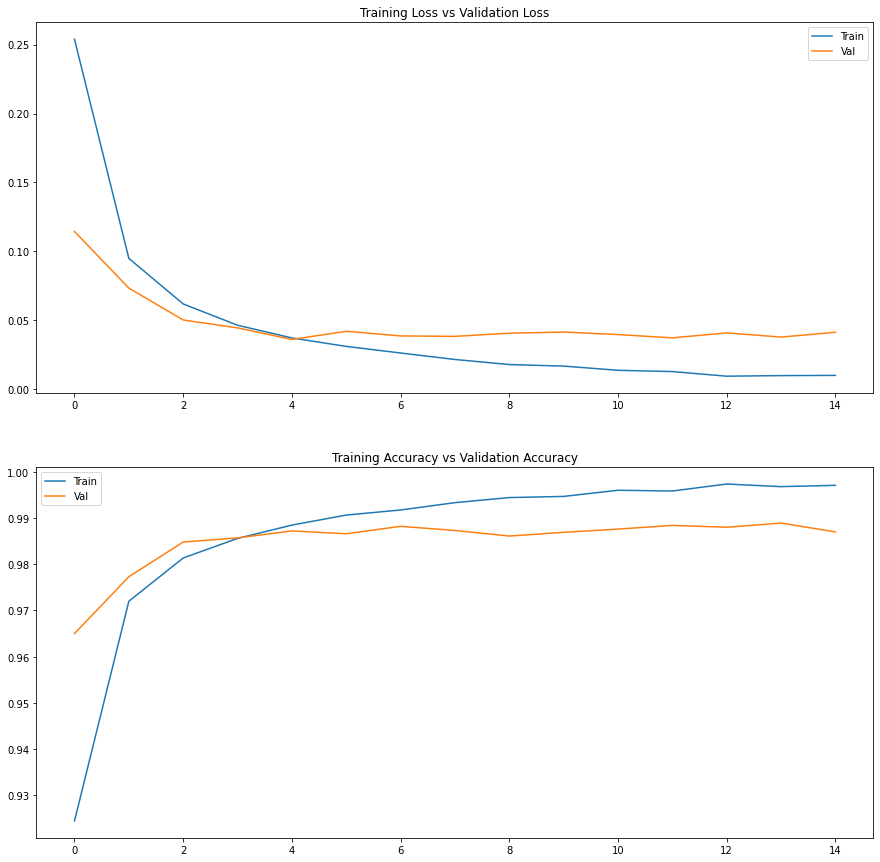

In [9]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'Val'])
axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train', 'Val'])

In [10]:
import tensorflow as tf
print(tf.__version__)  # 查看tensorflow版本
print(tf.__path__)     # 查看tensorflow安装路径

a = tf.test.is_built_with_cuda()  # 判断CUDA是否可以用
b = tf.test.is_gpu_available(
    cuda_only=False,
    min_cuda_compute_capability=None
)  # 判断GPU是否可以用

print(a) # 显示True表示CUDA可用
print(b) # 显示True表示GPU可用

# 查看驱动名称
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")


2.6.0
['C:\\Users\\alber\\anaconda3\\envs\\tensorflow-gpu\\lib\\site-packages\\keras\\api\\_v2', 'C:\\Users\\alber\\anaconda3\\envs\\tensorflow-gpu\\lib\\site-packages\\tensorflow_estimator\\python\\estimator\\api\\_v2', 'C:\\Users\\alber\\anaconda3\\envs\\tensorflow-gpu\\lib\\site-packages\\tensorboard\\summary\\_tf', 'C:\\Users\\alber\\anaconda3\\envs\\tensorflow-gpu\\lib\\site-packages\\tensorflow', 'C:\\Users\\alber\\anaconda3\\envs\\tensorflow-gpu\\lib\\site-packages\\tensorflow\\_api\\v2']
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True
True
Default GPU Device: /device:GPU:0
